In [3]:
#4.2.1 2乗和誤差

import numpy as np

def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)

t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0] #正解を「2」とする

#例1:「2」の確率が最も高い場合
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0] 
mean_squared_error(np.array(y), np.array(t))

0.097500000000000031

In [4]:
#例1:「7」の確率が最も高い場合
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0] 
mean_squared_error(np.array(y), np.array(t))

0.59750000000000003

In [7]:
def cross_entropy_error(y, t):
    delta = 1e-7 #log(0)のオーバーフロー対策
    return -np.sum(t*np.log(y+delta))

In [8]:
# t=1のときy=0.6
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05 , 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

0.51082545709933802

In [9]:
# t=1のときy=0.1
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

2.3025840929945458

In [10]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist #load_mnist関数はMNISTデータセットを読み込むための関数

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
# one_hot_label=Trueとすることにより、one-hot表現とするデータ構造を取得できる

print(x_train.shape) #(60000, 784)
print(t_train.shape) #(60000, 10)

(60000, 784)
(60000, 10)


In [11]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size) 
# np.random.choice()を使えば、指定された数字の中からタンダムに好きな数だけ取り出すことができる。
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [16]:
np.random.choice(60000, 10)
# 0から60000未満の数字の中からランダムに10個の数字を選び出す
# 後はインデックスを指定して、ミニバッチを取り出し、損失関数を計算する
# 関東地方の中から無作為に選ばれた1000生体を対象に視聴率を計測することで、関東地方全体の視聴率を近似して求めることができる
# 1000世帯の視聴率は、全体のおおよその値として用いることができる

array([22205, 33493, 27136, 26678, 10321, 32623, 47497, 47449, 14527, 34923])

In [17]:
#ミニバッチのようなバッチデータに対応した交差エントロピー誤差
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

In [19]:
# yはニューラルネットワークの出力
# tは教師データ
# 教師データがラベルとして与えられたとき(one-hot表現ではないとき)を考える
def cross_entropy_error(y, t):
    if y.dim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arrange(batch_size), t] + 1e-07)) / batch_size

# np.arange(batch_size)は、0からbatch_size-1までの配列を生成する。
# 例えばbatch_sizeが5だとしたら、np.arange(batch_size)は[0,1,2,3,4]のNumPy配列を生成する。
# tにはラベルが[2,7,0,9,4]のように格納されているので、y[np.arange(batch_size),t]は、
# 各データの正解ラベルに対応するニューラルネットワークの出力を抽出する

In [20]:
# 4.3.1 微分
# 悪い実装例
def numerical_diff(f, x):
    h = 10e-50  #丸め誤差の問題が起きる
    return (f(x+h) -f(x) / h)

In [21]:
# 丸め誤差の例
np.float32(1e-50)

0.0

In [23]:
# 中心差分をとる
def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)

In [24]:
# 4.3.2
def function_1(x):
    return 0.01*x**2 + 0.1*x

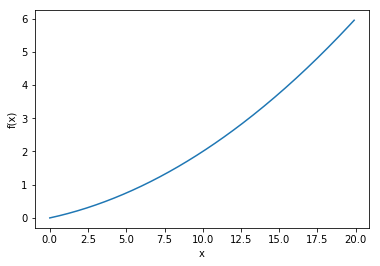

In [26]:
import numpy as np
import matplotlib.pylab as plt

x = np.arange(0.0, 20.0, 0.1) # 0から20まで、0.1刻みのx配列
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [27]:
numerical_diff(function_1, 5)

0.1999999999990898

In [28]:
numerical_diff(function_1, 10)

0.2999999999986347

0.1999999999990898


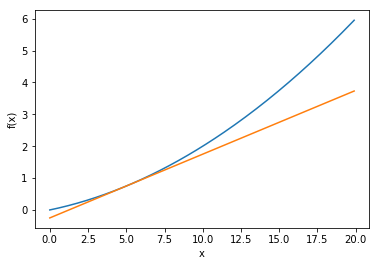

In [29]:
# coding: utf-8
import numpy as np
import matplotlib.pylab as plt


def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)


def function_1(x):
    return 0.01*x**2 + 0.1*x 


def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")

tf = tangent_line(function_1, 5)
y2 = tf(x)

plt.plot(x, y)
plt.plot(x, y2)
plt.show()


In [31]:
# 4.3.3
def function_2(x):
    return x[0]**2 + x[1]**2
    # または return np.sum(x**2)

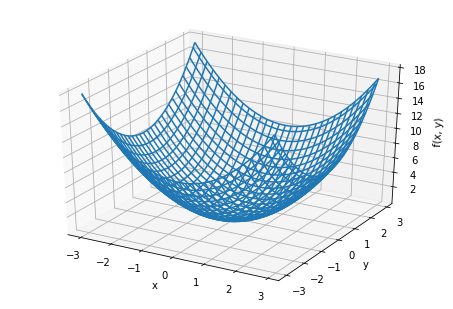

In [44]:
# 発展
# https://qiita.com/orange_u/items/8a1e285a45093857aef7

# import
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

# 関数定義
def func1(x, y):
    return x**2 + y**2

# 軸範囲
x = np.arange(-3.0, 3.0, 0.1)
y = np.arange(-3.0, 3.0, 0.1)

# X,Y,Zを定義
X, Y = np.meshgrid(x, y)
Z = func1(X, Y)

# グラフの作成
fig = plt.figure()
ax = Axes3D(fig)

# 軸ラベルの設定
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x, y)")

# グラフ描画
ax.plot_wireframe(X, Y, Z)
plt.show()

In [45]:
# 発展
# https://qiita.com/orange_u/items/8a1e285a45093857aef7

# import
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

# 関数定義
def function_2(x):
    return x[0]**2 + x[1]**2

# 軸範囲
x = np.arange(-3.0, 3.0, 0.1)


# X,Y,Zを定義
X = np.meshgrid(x)
Y = func1(X[0], X[1])

# グラフの作成
fig = plt.figure()
ax = Axes3D(fig)

# 軸ラベルの設定
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x, y)")

# グラフ描画
ax.plot_wireframe(X[0], X[1], Y)
plt.show()


#失敗

IndexError: list index out of range

In [46]:
# 問1
def function_tmp(x0):
    return x0*x0 + 4.0**2.0

numerical_diff(function_tmp, 3.0)

6.00000000000378

In [47]:
def function_tmp2(x1):
    return 3.0**2.0 + x1*x1

numerical_diff(function_tmp2, 4.0)

7.999999999999119

In [48]:
# 4.4 勾配
def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # xと同じ形状の配列を生成
    
    for idx in range(x.size):
        tmp_val = x[idx]
        # f(x+h)の計算
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        # f(x-h)の計算
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 値を元に戻す
    
    return grad

In [49]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([ 6.,  8.])

In [50]:
numerical_gradient(function_2, np.array([0.0, 2.0]))

array([ 0.,  4.])

In [51]:
numerical_gradient(function_2, np.array([3.0, 0.0]))

array([ 6.,  0.])

C:\Users\NEC-PCuser\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


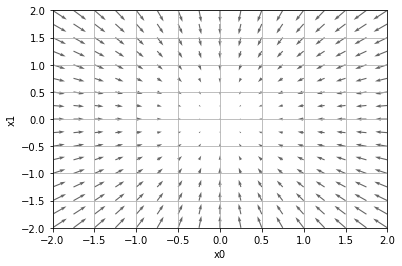

In [52]:
# coding: utf-8
# cf.http://d.hatena.ne.jp/white_wheels/20100327/p3
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D


def _numerical_gradient_no_batch(f, x):
    h = 1e-4  # 0.0001
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)  # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x)  # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val  # 値を元に戻す
        
    return grad


def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad


def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)


def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y


if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)
    
    X = X.flatten()
    Y = Y.flatten()
    
    grad = numerical_gradient(function_2, np.array([X, Y]))
    
    plt.figure()
    plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
    plt.legend()
    plt.draw()
    plt.show()

In [54]:
# 4.4.1

def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x # 初期値
    
    for i in range(step_num): #step_numは勾配法による繰り返しの数
        grad = numerical_gradient(f, x)
        x -= lr * grad # lrはlearning rate(学習率)
        
    return x

In [61]:
def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)

(array([ -6.11110793e-10,   8.14814391e-10]),
 array([[ -3.00000000e+00,   4.00000000e+00],
        [ -2.40000000e+00,   3.20000000e+00],
        [ -1.92000000e+00,   2.56000000e+00],
        [ -1.53600000e+00,   2.04800000e+00],
        [ -1.22880000e+00,   1.63840000e+00],
        [ -9.83040000e-01,   1.31072000e+00],
        [ -7.86432000e-01,   1.04857600e+00],
        [ -6.29145600e-01,   8.38860800e-01],
        [ -5.03316480e-01,   6.71088640e-01],
        [ -4.02653184e-01,   5.36870912e-01],
        [ -3.22122547e-01,   4.29496730e-01],
        [ -2.57698038e-01,   3.43597384e-01],
        [ -2.06158430e-01,   2.74877907e-01],
        [ -1.64926744e-01,   2.19902326e-01],
        [ -1.31941395e-01,   1.75921860e-01],
        [ -1.05553116e-01,   1.40737488e-01],
        [ -8.44424930e-02,   1.12589991e-01],
        [ -6.75539944e-02,   9.00719925e-02],
        [ -5.40431955e-02,   7.20575940e-02],
        [ -4.32345564e-02,   5.76460752e-02],
        [ -3.45876451e-02,   4.611

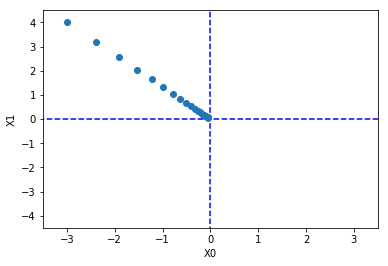

In [57]:
# coding: utf-8
import numpy as np
import matplotlib.pylab as plt
from gradient_2d import numerical_gradient


def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)


def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])    

lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

In [60]:
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num=100)

# 多数表示されるのはバグ

(array([-2.99999994,  3.99999992]), array([[-3.        ,  4.        ],
        [-3.        ,  4.        ],
        [-3.        ,  4.        ],
        [-3.        ,  4.        ],
        [-3.        ,  4.        ],
        [-3.        ,  4.        ],
        [-3.        ,  4.        ],
        [-3.        ,  3.99999999],
        [-3.        ,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999998],
        [-2.99999999,  3.99999998],
        [-2.99999999,  3.99999998],
        [-2.99999999,  3.99999998],
        [-2.99999999,  3.99999998],
        [-2.99999999,  3.99999998],
        [-2.99999998,  3.99999998],
        [-2.99999998,  3.9999

In [63]:
# 4.4.2 ニューラルネットワークに対する勾配

import sys, os
sys.path.append(os.pardir)
import numpy as np
from common.functions import softmax, cross_entropy_error #softmaxとcross_entropy_errorメソッドを使用
from common.gradient import numerical_gradient

class simpleNet: #simpleNetのクラスを実装
    def __init__(self):
        self.W = np.random.randn(2, 3) # ガウス分布で初期化
    
    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        
        return loss

In [71]:
net = simpleNet()
print(net.W) #重みパラメータ

[[ 0.33121016  0.69700865  0.41323223]
 [ 2.49547606 -0.54200009 -2.12083769]]


In [72]:
x = np.array([0.6, 0.9])
p = net.predict(x) #予測する多めのメソッド
print(p)

[ 2.44465455 -0.06959489 -1.66081458]


In [77]:
np.argmax(p)

0

In [78]:
t = np.array([0, 0, 1]) #正解ラベル
net.loss(x, t) #損失関数の値を求めるためのメソッド

4.1985209523124878

In [79]:
# 勾配を求める
def f(W): #損失関数を計算する新しい関数fを定義
    return net.loss(x, t)

dW = numerical_gradient(f, net.W) #結果はdWとなる
print(dW)

[[ 0.54674609  0.04423937 -0.59098546]
 [ 0.82011914  0.06635905 -0.88647819]]


In [81]:
# lambda記法を使ったプログラム
f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)

In [99]:
import sys, os
sys.path.append(os.pardir)
from common.functions import *
from common.gradient import numerical_gradient

class TwoLayerNet:
    
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        #重みの初期化
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
        
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
    
    # x:入力データ, t:教師データ
    def loss(self, x, t):
        y = self.predict(x)
    
        return cross_entropy_error(y, t)

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
    
        accuracy = np.sum(y==t) / float(x.shape[0])
        return accuracy

    # x:入力データ, t:教師データ
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
    
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1']) 
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
    
        return grads

In [100]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
net.params['W1'].shape # (784, 100)
net.params['b1'].shape # (100,)
net.params['W2'].shape # (100, 10)
net.params['b2'].shape # (10,)

(10,)

In [101]:
x = np.random.rand(100, 784) # ダミーの入力データ
y = net.predict(x)

In [105]:
x = np.random.rand(100, 784) #ダミーの入力データ (100枚分)
t = np.random.rand(100, 10) #ダミーの正解ラベル (100枚分)

grads = net.numerical_gradient(x, t) # 勾配を計算

grads['W1'].shape # (784, 100)
grads['b1'].shape # (100,)
grads['W2'].shape # (100, 10)
grads['b2'].shape # (10,)

(10,)

In [ ]:
# 4.5.2 ミニバッチ学習の実装
import numpy as np
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

train_loss_list = []

#ハイパーパラメータ
iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
    #ミニバッチの取得
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    #勾配の計算
    grad = network.numerical_gradient(x_batch, t_batch)
    # grad = network.gradient(x_batch, t_batch) #高速版
    
    #パラメータの更新
    for key in ('W1', 'b2', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
        
    #学習経過の記録
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

In [ ]:
# 4.5.3 テストデータで評価
import numpy as np
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

train_loss_list = []
train_acc_list = []
test_acc_list = []
# 1エポックあたりの繰り返し数
iter_per_epoch = max(train_size / batch_size, 1)

# ハイパーパラメータ
iters_num = 10000
batch_size = 100
learning_rate = 0.1

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iter_num):
    #ミニバッチの取得
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    #勾配の計算
    grad = network.numerical_gradient(x_batch, t_batch)
    # grad = network.gradient(x_batch, t_batch) #高速版
    
    #パラメータｎ更新
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
        
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # 1エポックごとに認識制度を計算
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc |" + str(train_acc)+","+str(test_acc))